# 数据可视化



In [3]:
#加载库
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Illegal line #1
	"{\rtf1\ansi\ansicpg936\cocoartf1671\cocoasubrtf200
"
	in file "/Users/ousei/.matplotlib/matplotlibrc"
Illegal line #2
	"{\fonttbl\f0\fnil\fcharset0 Menlo-Regular;}
"
	in file "/Users/ousei/.matplotlib/matplotlibrc"
Illegal line #3
	"{\colortbl;\red255\green255\blue255;\red0\green0\blue0;\red255\green255\blue255;}
"
	in file "/Users/ousei/.matplotlib/matplotlibrc"
Illegal line #4
	"{\*\expandedcolortbl;;\cssrgb\c0\c0\c0;\cssrgb\c100000\c100000\c100000;}
"
	in file "/Users/ousei/.matplotlib/matplotlibrc"
Illegal line #5
	"\paperw11900\paperh16840\margl1440\margr1440\vieww10800\viewh8400\viewkind0
"
	in file "/Users/ousei/.matplotlib/matplotlibrc"
Illegal line #6
	"\deftab720
"
	in file "/Users/ousei/.matplotlib/matplotlibrc"
Illegal line #7
	"\pard\pardeftab720\sl260\partightenfactor0
"
	in file "/Users/ousei/.matplotlib/matplotlibrc"
Illegal line #9
	"\f0\fs22 \cf2 \cb3 \expnd0\expndtw0\kerning0
"
	in file "/Users/ousei/.matplotlib/matplotlibrc"

Bad key "\outl0\stroke

In [4]:
#导入result.csv
text = pd.read_csv('result.csv')
text.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S


最基本的可视化图案有哪些？分别适用于那些场景？

1.柱状图

展示多个分类的数据变化和同类别各变量之间的比较情况

2.条形图

类似柱状图，只不过两根轴对调了一下

3.折线图

展示数据随时间或有序类别的波动情况的趋势变化

4.柱线图

结合柱状图和折线图在同一个图表展现数据

5.散点图

用于发现各变量之间的关系。

6.饼图

用来展示各类别占比，比如男女比例。




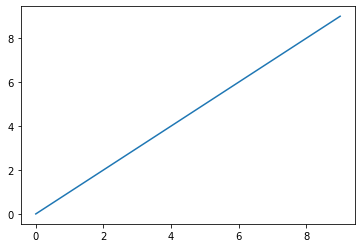

In [5]:
#了解matplotlib，自己创建一个数据项，对其进行基本可视化

data = np.arange(10)
plt.plot(data)

In [5]:
#可视化展示泰坦尼克号数据集中男女中生存人数分布情况,柱状图
survived_sex = text.groupby('Sex')['Survived'].sum()

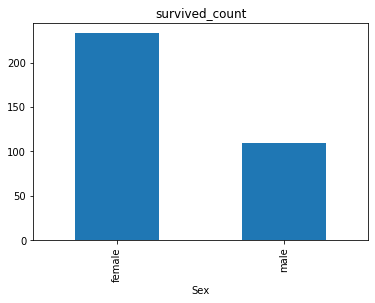

In [7]:
survived_sex.plot.bar()
plt.title('survived_count')
plt.show()

Text(0, 0.5, 'count')

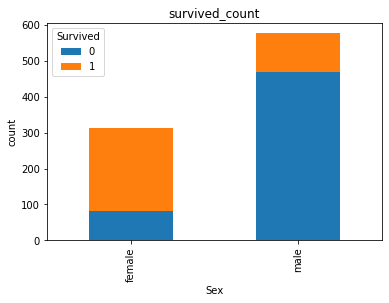

In [11]:
#可视化展示泰坦尼克号数据集中男女中生存人与死亡人数的比例图,柱状图
text.groupby(['Sex','Survived'])['Survived'].count().unstack().plot(kind='bar',stacked='True')
plt.title('survived_count')
plt.ylabel('count')

In [12]:
#可视化展示泰坦尼克号数据集中不同票价的人生存和死亡人数分布情况 折线图 横轴是不同票价,纵轴是存活人数
#计算不同票价中生存与死亡人数 1表示生存，0表示死亡
fare_sur = text.groupby(['Fare'])['Survived'].value_counts().sort_values(ascending=False)
fare_sur

Fare     Survived
8.0500   0           38
7.8958   0           37
13.0000  0           26
7.7500   0           22
26.0000  0           16
                     ..
20.2500  1            1
         0            1
18.7875  1            1
         0            1
15.0500  0            1
Name: Survived, Length: 330, dtype: int64

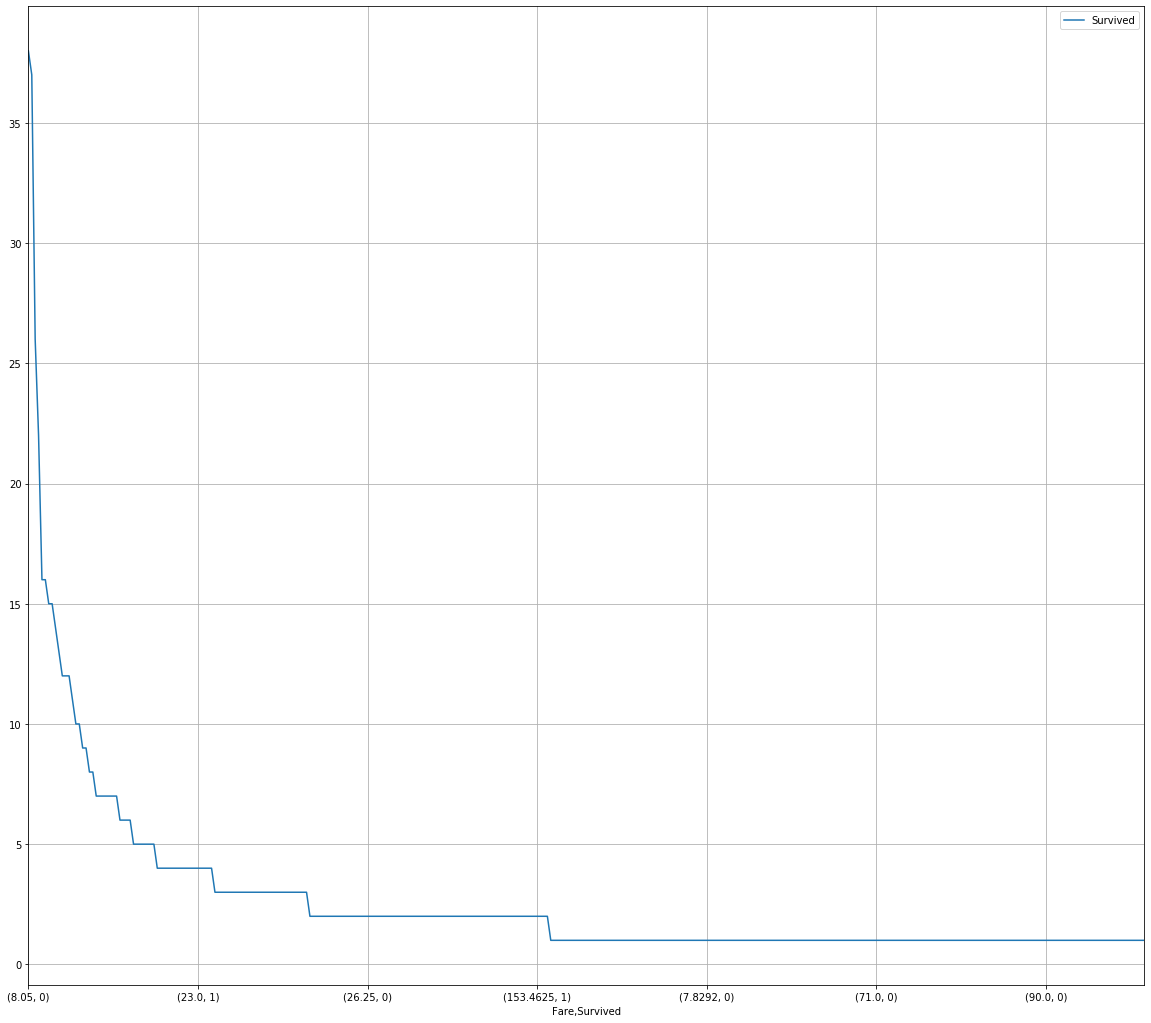

In [13]:
fig = plt.figure(figsize=(20,18))
fare_sur.plot(grid=True)
plt.legend()
plt.show()

In [16]:
# 排序前绘折线图
fare_sur1 = text.groupby(['Fare'])['Survived'].value_counts()
fare_sur1

Fare      Survived
0.0000    0           14
          1            1
4.0125    0            1
5.0000    0            1
6.2375    0            1
                      ..
247.5208  1            1
262.3750  1            2
263.0000  0            2
          1            2
512.3292  1            3
Name: Survived, Length: 330, dtype: int64

排序了之后折线图就变的十分有规律,很难看出波动情况的趋势变化了

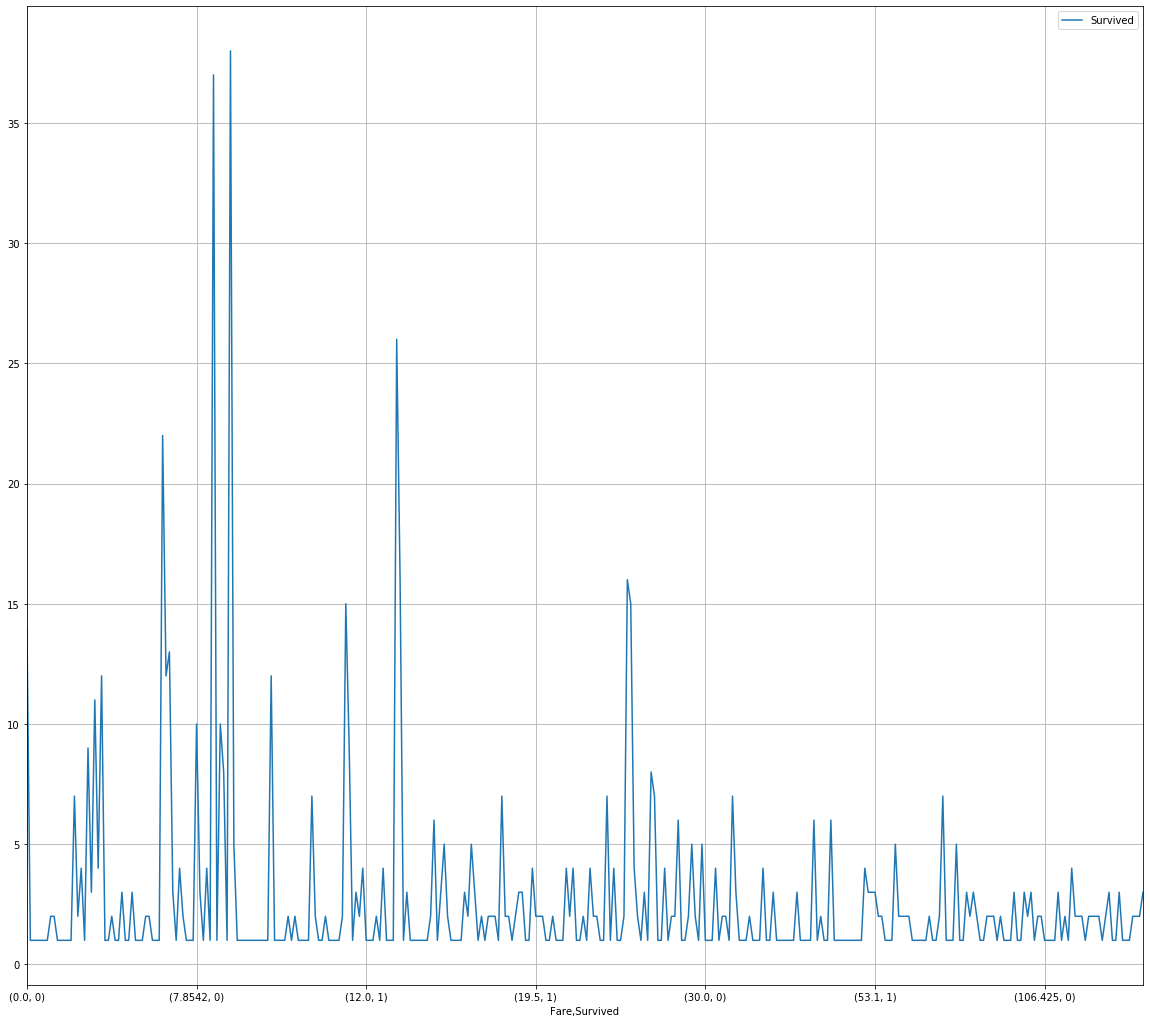

In [17]:
fig = plt.figure(figsize=(20,18))
fare_sur1.plot(grid=True)
plt.legend()
plt.show()

In [20]:
#可视化展示泰坦尼克号数据集中不同仓位等级的人生存和死亡人员的分布情况。柱状图
# 1表示生存,0表示死亡
pclass_sur = text.groupby(['Pclass'])['Survived'].value_counts()
pclass_sur

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

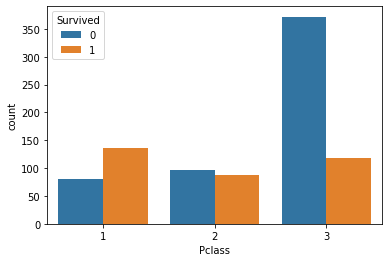

In [21]:
import seaborn as sns
sns.countplot(x="Pclass",hue="Survived",data=text)